# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import datetime  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# the name of the dataset
name = 'mergedData041022'

In [4]:
# read the data to a dataframe
data = pd.read_csv('data/' + name + '.csv')

### Dates the data covers

In [5]:
#find the date of the first listing
first = data["creation_timestamp"].min()
datetime.date.fromtimestamp(first)

datetime.date(2022, 3, 23)

In [6]:
#find the date of the last listing
last = data["creation_timestamp"].max()
datetime.date.fromtimestamp(last)

datetime.date(2022, 4, 10)

### Clean Up Columns

In [7]:
#rename columns to distinguish between attributes of the listings vs attributes of the shops
data = data.rename(columns={'title_x':'title_listing','num_favorers_x':'num_favorers_listing','title_y':'title_shop','num_favorers_y':'num_favorers_shop'})

In [8]:
#look at unique values in a single column and other characteristics
column = "num_favorers_listing"
values = list(set(data[column]))
#values
#len(values)
max(values)

26530

In [9]:
#Get URL for the shop for a specific listing
#This is the url for the shop with the highest number of favorers

data[data['num_favorers_listing'] == max(values)]['url']

3619    https://www.etsy.com/shop/juliaedean
Name: url, dtype: object

### Clean up the data

In [10]:
#drop irrelevant columns
data = data.drop(columns = ['Unnamed: 0','is_vacation', 'vacation_message', 'sale_message',])

In [11]:
#remove duplicate listings, keep the most recent
data = data[data.duplicated(subset='listing_id', keep='first')==False]

In [12]:
#identify columns that contain missing data
columns = data.columns

missing = []
for column in columns:
    null = data[data[column].isnull()]
    if len(null)!=0:
        missing.append(column)
        
missing

['title_shop',
 'announcement',
 'shipping_from_country_iso',
 'shop_location_country_iso',
 'review_average',
 'review_count']

In [13]:
"""the first four columns having missing data shouldn't affect the analysis, 
but I want to filter out the shops that have zero reviews (and therefore no review average)"""
missing

['title_shop',
 'announcement',
 'shipping_from_country_iso',
 'shop_location_country_iso',
 'review_average',
 'review_count']

In [14]:
# remove listings from shops with no reviews
data = data[data['review_average'].notnull()]

In [15]:
# Save the cleaned data
data.to_csv('data/' + name + 'clean.csv')

## Visualize and Explore

### Explore attributes of the shops

Text(0.5, 1.0, 'Number of Transactions')

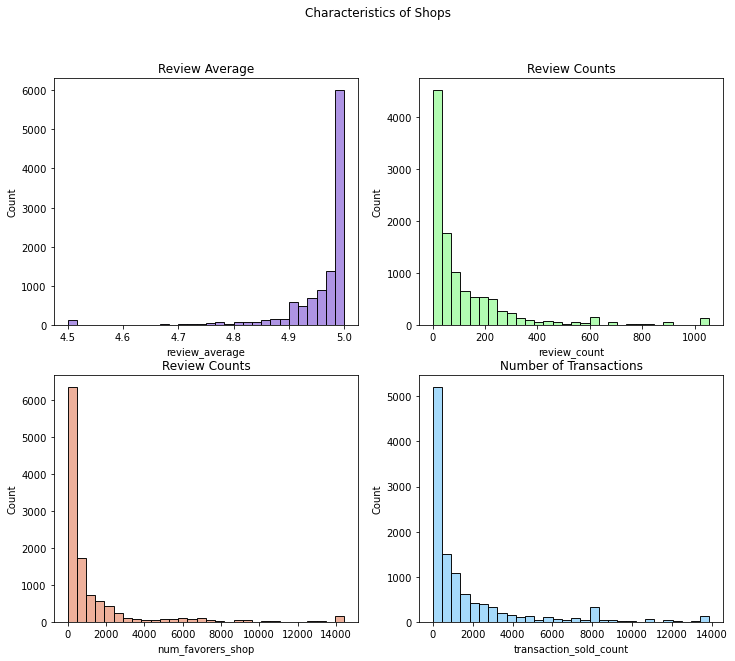

In [44]:
# Plot info about shops
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
fig.suptitle('Characteristics of Shops')

# plot the review averages
sns.histplot(ax=axes[0,0], data=np.clip(data['review_average'],data['review_average'].quantile(.01),5.0), 
             bins = 30, color='mediumpurple')
axes[0,0].set_title('Review Average')

# plot the review counts
sns.histplot(ax=axes[0,1], data=np.clip(data['review_count'],0,data['review_count'].quantile(.99)), 
             bins = 30, color = 'palegreen')
axes[0,1].set_title('Review Counts')

# plot the number of favorers
sns.histplot(ax=axes[1,0], data=np.clip(data['num_favorers_shop'],0,data['num_favorers_shop'].quantile(.99)), 
             bins = 30, color = 'darksalmon')
axes[1,0].set_title('Review Counts')

# plot the number of transactions
sns.histplot(ax=axes[1,1], data=np.clip(data['transaction_sold_count'],0,data['transaction_sold_count'].quantile(.99)), 
             bins = 30, color = 'lightskyblue')
axes[1,1].set_title('Number of Transactions')

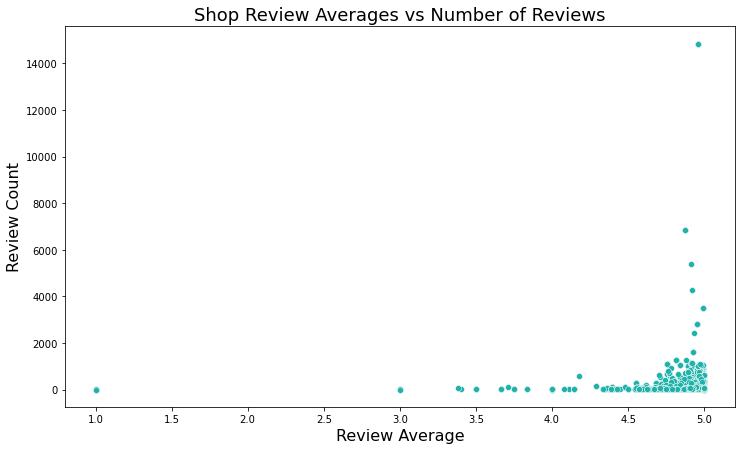

In [43]:
# Plot Review Averages vs Number of Reviews
plt.figure(figsize=(12, 7))

plt.title("Shop Review Averages vs Number of Reviews", fontdict={"fontsize":18})

plt.xlabel("Review Average", fontdict={"fontsize":16})
plt.ylabel("Review Count", fontdict={"fontsize":16})

sns.scatterplot(data=data, x='review_average', y='review_count', color = 'lightseagreen')

plt.show()

### Explore attributes of the listings

In [ ]:
### TO DO
plot only price amounts for prices in USD (and divide price amount by divisor to get more sensical price)

Text(0.5, 1.0, 'Number of Favorers')

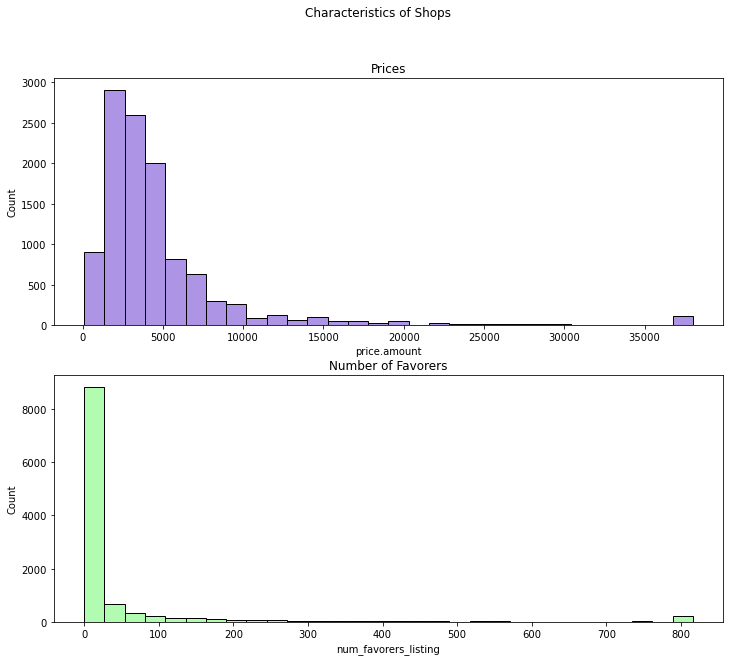

In [46]:
# Plot info about listing
fig, axes = plt.subplots(2, figsize = (12, 10))
fig.suptitle('Characteristics of Shops')

# plot the prices
sns.histplot(ax=axes[0], data=np.clip(data['price.amount'],0,data['price.amount'].quantile(.99)), 
             bins = 30, color='mediumpurple')
axes[0].set_title('Prices')

# plot the number of favorers
sns.histplot(ax=axes[1], data=np.clip(data['num_favorers_listing'],0,data['num_favorers_listing'].quantile(.98)), 
             bins = 30, color = 'palegreen')
axes[1].set_title('Number of Favorers')

## Filter by US data
In case I want to compare US vs. International Listings Later

In [66]:
#create dataframe with listings from shops based in the US
us_data = data[data["is_shop_us_based"]]

In [67]:
us_data

,listing_id,shop_id,title_listing,description,num_favorers_listing,listing_type,tags,materials,style,taxonomy_id,...,accepts_custom_requests,url,num_favorers_shop,languages,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,review_average,review_count
12,741580082,12228258,The Grate Plate Ceramic Grater 3 Piece set: Ce...,Hexagon plates measure approximately 4.5 inche...,2512,physical,"['garlic', 'grater', 'ceramic', 'ginger grater...",['Ceramic'],[],6503,...,False,https://www.etsy.com/shop/TheGratePlate,541,['en-US'],True,3372,US,US,4.9569,209.0
25,1144544594,6095187,New Celtic Shamrock logo for Irish or Scottish...,New Celtic Shamrock logo available! Beautifu...,8,physical,"['personalized pottery', 'stoneware pottery', ...","['stoneware pottery', 'Celtic Cross']","['Rustic', 'Cottage Chic']",1667,...,True,https://www.etsy.com/shop/zotterthepotter,2522,['en-US'],True,8839,NaN,US,4.8688,320.0
26,213780309,6095187,Personalized 50th Wedding Anniversary Gift (Sh...,Our Personalized Pottery Stoneware makes a gre...,1386,physical,"['personalized pottery', 'stoneware pottery', ...",['stoneware pottery'],"['Rustic', 'Cottage Chic']",1667,...,True,https://www.etsy.com/shop/zotterthepotter,2522,['en-US'],True,8839,NaN,US,4.8688,320.0
27,682959753,6095187,Personalized Mug featuring Crow logo,Price: $34.95\nSize: 5.5&quot; x 3.5&quot; \n\...,45,physical,"['personalized pottery', 'stoneware pottery', ...",['Ceramic'],"['Rustic', 'Cottage Chic']",1043,...,True,https://www.etsy.com/shop/zotterthepotter,2522,['en-US'],True,8839,NaN,US,4.8688,320.0
28,157043699,6095187,Personalized Stoneware Marriage Crock,Personalized Stoneware Marriage Crock makes a ...,101,physical,"['personalized pottery', 'stoneware pottery', ...",['stoneware pottery'],"['Rustic', 'Cottage Chic']",1667,...,True,https://www.etsy.com/shop/zotterthepotter,2522,['en-US'],True,8839,NaN,US,4.8688,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,1107088022,10843241,1970s Tea Set // “Mikasa” California Poppies /...,Looove this tea set!\n\nIn great condition \n\...,9,physical,"['Japanese', '80s', '50s', '60s', '70s', 'flow...",['Ceramic'],[],1943,...,False,https://www.etsy.com/shop/Missblooeyes,484,['en-US'],True,619,US,US,4.9934,152.0
11990,1155660656,22762679,Handmade Dragon Scale Mug || 12 Ounce Ceramic ...,Handmade Ceramic Dragon Mug -\n\nHand-thrown o...,87,physical,"['handmade mug', 'dragon mug', 'pottery mug', ...",['Ceramic'],[],1062,...,False,https://www.etsy.com/shop/RowdyDragonStudio,365,['en-US'],True,745,US,US,4.9484,213.0
11992,773448370,18717969,Bowl,Botanical Ceramic Bowl\n- Wheel thrown\n- Hand...,0,physical,"['Kitchen', 'Dish', 'Bowl', 'Stoneware', 'Hand...",['Stoneware'],[],6096,...,False,https://www.etsy.com/shop/MadisonRoseCeramics,43,['en-US'],True,73,US,US,4.8000,5.0
11993,787331049,18717969,Cylindrical Pot,- Ceramic\n- Wheel thrown\n- Handmade \n- Cyli...,1,physical,"['Planter', 'Cylinder', 'Stoneware', 'Kitchen'...",['Stoneware'],[],6096,...,False,https://www.etsy.com/shop/MadisonRoseCeramics,43,['en-US'],True,73,US,US,4.8000,5.0


## Facts

In [68]:
shop_ids = list(set(data["shop_id"]))
print("There are " + str(len(data)) + " listings created by " + str(len(shop_ids)) + " shops.")

There are 11240 listings created by 2592 shops.


In [69]:
# Look at the range of numbers for listings that individual shops made

data['shop_id'].value_counts()

8079723     142
18567051    110
15156502     84
23452608     79
7644078      69
           ... 
33465511      1
12819608      1
28844148      1
6118536       1
32683917      1
Name: shop_id, Length: 2592, dtype: int64